## Use the repetitive errors brought up by our customers as a reference to improve our services.

In [1]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import os

In [2]:
# Delete the new files to avoid duplications:
os.remove(r'F:\AIS\Enquiries and Pricing\Enquiries Log - 2023\\Dashboard\\Rank Results.xlsx')
#os.remove(r'C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\test\\Forms Charts.xlsx')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\\\Dashboard\\\\Rank Results.xlsx'

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

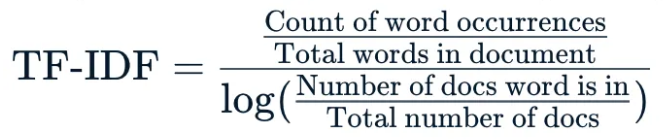

In [5]:
# Load the data
df = pd.read_excel (f'F:\AIS\Enquiries and Pricing\Enquiries Log - 2023\\SDI Logs and Enquiries Form.xlsx', 'Enquiry Sheet')

C:\Users\alvesd\AppData\Local\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
df=df.dropna(subset=['Question/ requests (Free text)'])

In [7]:
df.head()

,Email address,Full name,Company/ Department,Date,Contact Method,SDI Contact responsible,Enquiry type,Question/ requests (Free text),Solution type,Solution (Free text),SDI contact date,DataSet,Data avaliable to help?,Data in DataShop?,Datashop account created,Received/ purchased reports,Purchase price,Who will receive data
1,Di.Wu@weissasset.com,Di Wu,Weiss Asset Management,2021-12-13 00:00:00,Email,Ops,Data,What is the source of Production data?,Solution provided,Sarah responded,2021-12-13 00:00:00,Combination,No,No,Yes,NaN,NaN,NaN
2,Tricia.Stones@simonbailes.co.uk,Tricia Stones,Simon Bailes,2021-12-13 00:00:00,Email,NaN,MVRIS,29.12.21. Unable to fille out registration for...,Solution provided,4.1.22 JT asked which borwser and to spply scr...,2021-12-13 00:00:00,NaN,NaN,NaN,No,No,NaN,NaN
3,kevin@mackiemotors.com,Kevin,Mackie Motors,2021-12-13 00:00:00,Email,NaN,DataShop,After sending the invoice it appears he hadn’t...,DataShop email,Resloved by re-running the data. No price diff...,2021-12-13 00:00:00,NaN,NaN,NaN,Yes,Y,NaN,NaN
7,clester@rhomotion.com,Charles Lester,Rho Motion,2021-12-21 00:00:00,Email,James,Data,Requested publishing price so DataShop not app...,Manual Quote,4.1.2022. JT asked what they plan to do with d...,2021-12-23 00:00:00,New Reg - Car,Yes,Partly,Yes,Manual,NaN,NaN
8,gorin@arrival.com,Ed Gorin,Arrival,2022-01-06 00:00:00,Email,NaN,Data,requested to get registration data for vans wi...,DataShop email,NaN,2022-01-06 00:00:00,New Reg - LCV,Yes,Yes,Yes,No,NaN,NaN


In [8]:
corpus = list(df['Question/ requests (Free text)'].values)

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [10]:
threshold = 0.5

In [11]:
for x in range(0, X.shape[0]):
    for y in range(x, X.shape[0]):
        if (x != y):
            if (cosine_similarity(X[x], X[y]) > threshold):
                print(df["Email address"][x], ":", corpus[x])
                print(df["Email address"][y], ":", corpus[y])
                print("Cosine similarity:", cosine_similarity(X[x], X[y]))
                print()

jbritton@paybyphone.com : HCV over 6T with body type 
joel.teague@co-charger.com : HCV Over 6T 
Cosine similarity: [[0.78711643]]

Gourab.Mukherjee@directlinegroup.co.uk : After UK Used vehicle data 
Jessica.Dann@Jardinemotors.co.uk : After UK Used , Parc and New Regs data 
Cosine similarity: [[0.62493645]]

daniel.oldershaw@nortonmotorcycles.com : Could you please kindly let me know how much the subscription is for:
UK New Vehicle Data
UK Used Vehicle Data
Richard.M.Parkin@uk.gt.com : Could you please kindly let me know how much the subscription is for:
UK New Vehicle Data
UK Used Vehicle Data
Cosine similarity: [[1.]]

shaun.greasley@tecalliance.net : We are interested in what type/format of data you offer (e.g. csv files) and were wondering if you have any sample data available, so that we know what you are able to provide before we decide what data would be beneficial for us to purchase and use. Alternatively if sample data is not available, more detailed descriptions of each datas

## Rank the row based on the similar sentences using python

In [12]:
import textdistance

In [13]:
rank = (
    df.assign(
        match=df["Question/ requests (Free text)"].map(
            lambda x: max(
                [textdistance.jaro_winkler(x, text) for text in df["Question/ requests (Free text)"]],
                key=lambda x: x if x != 1 else 0,
            )
        )
    )
    .sort_values(by="match")
    .reset_index(drop=True)
)

In [14]:
# sort the vowels
rank = rank.sort_values('match', ascending=False)

In [15]:
# Export the results to Excel
rank.to_excel(r'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Rank Results.xlsx', index = False)

## Sentence similarity requests

In [18]:
# Load the data
df = pd.read_excel (f'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\SDI Logs and Enquiries Form.xlsx', 'Enquiry Sheet')

C:\Users\alvesd\AppData\Local\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [19]:
df = df[df['Question/ requests (Free text)'].notna()]

In [20]:
df1 = df[df['Solution (Free text)'].notna()]

In [21]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import re

In [22]:
# Clean text by removing special characters:
df1['Question/ requests (Free text)'] = re.sub(r'==.*?==+', '', str(df1['Question/ requests (Free text)']))
df1['Question/ requests (Free text)'] = df1['Question/ requests (Free text)'].replace('\n', '')

C:\Users\alvesd\AppData\Local\Temp\ipykernel_12872\897962746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Question/ requests (Free text)'] = re.sub(r'==.*?==+', '', str(df1['Question/ requests (Free text)']))
C:\Users\alvesd\AppData\Local\Temp\ipykernel_12872\897962746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Question/ requests (Free text)'] = df1['Question/ requests (Free text)'].replace('\n', '')


In [23]:
# Clean text by removing special characters:
df1['Solution (Free text)'] = re.sub(r'==.*?==+', '', str(df1['Solution (Free text)']))
df1['Solution (Free text)'] = df1['Solution (Free text)'].replace('\n', '')

C:\Users\alvesd\AppData\Local\Temp\ipykernel_12872\2454818266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Solution (Free text)'] = re.sub(r'==.*?==+', '', str(df1['Solution (Free text)']))
C:\Users\alvesd\AppData\Local\Temp\ipykernel_12872\2454818266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Solution (Free text)'] = df1['Solution (Free text)'].replace('\n', '')


In [24]:
from difflib import SequenceMatcher, get_close_matches

In [25]:
df1['best_match'] = [x for x in df1['Question/ requests (Free text)'].str.lower() for x in get_close_matches(x, df1['Solution (Free text)'].str.lower()) or ['']]

C:\Users\alvesd\AppData\Local\Temp\ipykernel_12872\1045167653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['best_match'] = [x for x in df1['Question/ requests (Free text)'].str.lower() for x in get_close_matches(x, df1['Solution (Free text)'].str.lower()) or ['']]


In [26]:
df1['similarity_score'] = df1.apply(lambda x: SequenceMatcher(None, x['Question/ requests (Free text)'].lower(), x['best_match']).ratio(), axis=1)

C:\Users\alvesd\AppData\Local\Temp\ipykernel_12872\3874070321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['similarity_score'] = df1.apply(lambda x: SequenceMatcher(None, x['Question/ requests (Free text)'].lower(), x['best_match']).ratio(), axis=1)


In [27]:
df1 = df1.assign(similarity_flag = df1['similarity_score'].gt(0.6).astype(int)).drop(columns=['best_match'])

In [28]:
df1

,Email address,Full name,Company/ Department,Date,Contact Method,SDI Contact responsible,Enquiry type,Question/ requests (Free text),Solution type,Solution (Free text),SDI contact date,DataSet,Data avaliable to help?,Data in DataShop?,Datashop account created,Received/ purchased reports,Purchase price,Who will receive data,similarity_score,similarity_flag
1,Di.Wu@weissasset.com,Di Wu,Weiss Asset Management,2021-12-13 00:00:00,Email,Ops,Data,1 What is the source of Produc...,Solution provided,1 Sarah...,2021-12-13 00:00:00,Combination,No,No,Yes,NaN,NaN,NaN,0.0,0
2,Tricia.Stones@simonbailes.co.uk,Tricia Stones,Simon Bailes,2021-12-13 00:00:00,Email,NaN,MVRIS,1 What is the source of Produc...,Solution provided,1 Sarah...,2021-12-13 00:00:00,NaN,NaN,NaN,No,No,NaN,NaN,0.0,0
3,kevin@mackiemotors.com,Kevin,Mackie Motors,2021-12-13 00:00:00,Email,NaN,DataShop,1 What is the source of Produc...,DataShop email,1 Sarah...,2021-12-13 00:00:00,NaN,NaN,NaN,Yes,Y,NaN,NaN,0.0,0
7,clester@rhomotion.com,Charles Lester,Rho Motion,2021-12-21 00:00:00,Email,James,Data,1 What is the source of Produc...,Manual Quote,1 Sarah...,2021-12-23 00:00:00,New Reg - Car,Yes,Partly,Yes,Manual,NaN,NaN,0.0,0
14,nick@emissionsanalytics.com,Nick Molden,Emissions Analytics,2022-01-30 00:00:00,Email,Sugam,Data,1 What is the source of Produc...,DataShop email,1 Sarah...,2022-02-28 00:00:00,New Reg - Car,Yes,Partly,No,No,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Ade.Adeosun@inchcape.com,Ade Adeosun,Inchcape,2023-03-08 00:00:00,Email,James,Data,1 What is the source of Produc...,Solution provided,1 Sarah...,2023-03-08 00:00:00,NaN,Yes,Yes,Yes,Datashop,NaN,Inchcape,0.0,0
214,lee.braybrook@bp.com,Lee Braybrook,BP,2023-03-09 00:00:00,Email,James,General enquiry,1 What is the source of Produc...,Solution provided,1 Sarah...,2023-03-09 00:00:00,NaN,Yes,No,Yes,Datashop,1344,BP,0.0,0
215,markashcroft@sytner.co.uk,Mark Ashcroft,NaN,2023-03-09 00:00:00,Email,Noshin,General enquiry,1 What is the source of Produc...,Solution provided,1 Sarah...,2023-03-09 00:00:00,NaN,Yes,No,Yes,Datashop,NaN,NaN,0.0,0
216,info@hekwindscreens.co.uk,Mohammad Amin Hazrati,Hekwindscreens Ltd.,2023-03-09 00:00:00,Email,Noshin,General enquiry,1 What is the source of Produc...,No Solution,1 Sarah...,2023-03-09 00:00:00,NaN,No,No,No,No,NaN,Hekwindscreens Ltd.,0.0,0


In [29]:
# Export the results to Excel
df1.to_excel(r'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Sentence_similarity_requests.xlsx', index = False)